# Preprocessing

In [ ]:
!pip install tensorflow==2.13.0

  Using cached tensorflow-2.13.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached grpcio-1.58.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.3 MB)
  Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl (22.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached h5py-3.9.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached numpy-1.24.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached flatbuffer

In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from tensorflow.keras import utils

import warnings
warnings.filterwarnings('ignore')

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
# 데이터 불러오기
data = pd.read_csv('diabetes_generators.csv', index_col=0)

In [ ]:
data.head()

,Glucose,BMI,Age,Outcome
0,148.0,33.6,50,1
1,85.0,26.6,31,0
2,183.0,23.3,32,1
3,89.0,28.1,21,0
4,137.0,43.1,33,1


In [ ]:
# 정답 데이터 분리
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# RobustScaler 적용 (중앙값과 IQR을 사용하여 스케일 조정)
scaler = RobustScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [ ]:
# 전처리된 데이터로 변환
# X_train_transformed = preprocessor_pipe.transform(X_train)
# X_test_transformed = preprocessor_pipe.transform(X_test)

In [ ]:
# !pip install imblearn

In [ ]:
# # SMOTE 오버샘플링 적용
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_transformed, y_train = smote.fit_resample(X_train_transformed, y_train)

In [ ]:
# One-Hot 인코딩
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

# Deep-Learning

In [ ]:
from tensorflow import keras
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [ ]:
model = models.Sequential()

# Input-layer (with he-initialization)
model.add(layers.Dense(input_dim=3, units=256, activation=None, kernel_initializer=initializers.he_uniform())) # he-uniform initialization
model.add(layers.Activation('elu'))

# Hidden-layers
model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.Activation('elu'))
model.add(layers.Dropout(rate=0.5)) # Dropout-layer

# Output-layer
model.add(layers.Dense(units=2, activation='softmax')) # Apply softmax function on model's output

In [ ]:
# "Compile" the model description (Configures the model for training)
model.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
# 모델 체크포인트 파일(중간 저장 모델)을 저장할 경로 설정
checkpoint_path = 'DL_checkpoint.h5'

In [ ]:
# "ModelCheckpoint" 콜백함수 객체 생성
callback_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         monitor='val_accuracy',
                                                         mode='max',           # val_accuracy가 큰 모델을 저장
                                                         save_best_only=True,  # "Save" the "best" model "only"
                                                         verbose=0)                                                                                                                                 # 커스텀 콜백함수 사용 가능

In [ ]:
# 모델 학습
history = model.fit(X_train_transformed, y_train, batch_size=100, epochs=20, validation_split=0.3, callbacks=[callback_checkpoint])

Epoch 1/20
4/4 [==============================] - 1s 149ms/step - loss: 1.8733 - accuracy: 0.6507 - val_loss: 1.6473 - val_accuracy: 0.7099
Epoch 2/20
4/4 [==============================] - 0s 34ms/step - loss: 1.4819 - accuracy: 0.7787 - val_loss: 1.3125 - val_accuracy: 0.7037
Epoch 3/20
4/4 [==============================] - 0s 74ms/step - loss: 1.0056 - accuracy: 0.7360 - val_loss: 0.8125 - val_accuracy: 0.7160
Epoch 4/20
4/4 [==============================] - 0s 54ms/step - loss: 0.8522 - accuracy: 0.7280 - val_loss: 0.6198 - val_accuracy: 0.7037
Epoch 5/20
4/4 [==============================] - 0s 64ms/step - loss: 0.7285 - accuracy: 0.7387 - val_loss: 0.6454 - val_accuracy: 0.7284
Epoch 6/20
4/4 [==============================] - 0s 34ms/step - loss: 0.7800 - accuracy: 0.7467 - val_loss: 0.6424 - val_accuracy: 0.7222
Epoch 7/20
4/4 [==============================] - 0s 36ms/step - loss: 0.6534 - accuracy: 0.7253 - val_loss: 0.6185 - val_accuracy: 0.7222
Epoch 8/20
4/4 [==========

In [ ]:
# 마지막 학습 완료 시점을 기준으로 한 모델 성능

result = model.evaluate(X_test_transformed, y_test)
print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

8/8 [==============================] - 0s 10ms/step - loss: 0.6028 - accuracy: 0.7316
loss (cross-entropy) : 0.602833092212677
test accuracy : 0.7316017150878906


In [ ]:
# 가장 높은 Validation accuracy를 기준으로 한 모델 성능
model = models.load_model('DL_checkpoint.h5')
results = model.evaluate(X_test_transformed, y_test)
print('loss (cross-entropy) :', results[0])
print('test accuracy :', results[1])

8/8 [==============================] - 0s 10ms/step - loss: 0.6319 - accuracy: 0.7446
loss (cross-entropy) : 0.6318603157997131
test accuracy : 0.7445887327194214


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

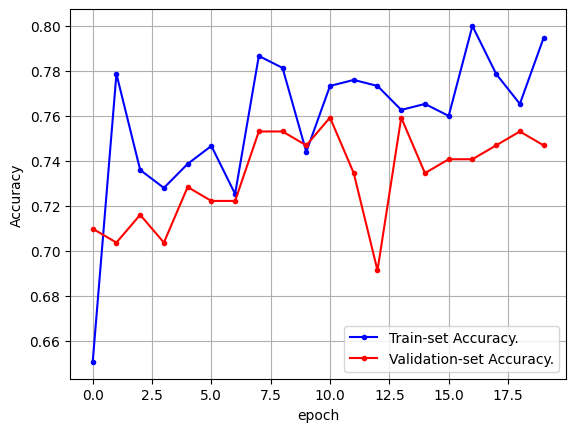

In [ ]:
# Epoch별 accuracy, val_accuracy값 변화 그래프
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

x_len = np.arange(len(accuracy))

plt.plot(x_len, accuracy, marker='.', c='blue', label="Train-set Accuracy.")
plt.plot(x_len, val_accuracy, marker='.', c='red', label="Validation-set Accuracy.")

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

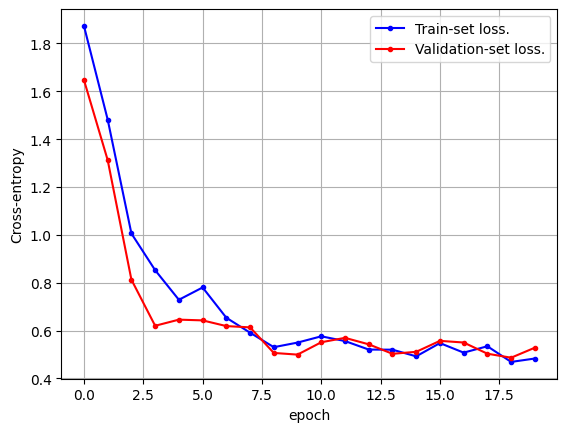

In [ ]:
# Epoch별 loss, val_loss값 변화 그래프
loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(accuracy))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

In [ ]:
# test data 예측
predictions = model.predict(X_test_transformed)
print(predictions)

8/8 [==============================] - 0s 9ms/step
[[6.80410981e-01 3.19589019e-01]
 [9.62137520e-01 3.78624238e-02]
 [9.93225574e-01 6.77441107e-03]
 [9.87118423e-01 1.28814820e-02]
 [3.73976409e-01 6.26023650e-01]
 [4.53269005e-01 5.46730936e-01]
 [9.99995887e-01 4.05419496e-06]
 [2.90830880e-01 7.09169149e-01]
 [1.11788154e-01 8.88211787e-01]
 [1.95326060e-01 8.04673851e-01]
 [8.13601136e-01 1.86398938e-01]
 [2.92083062e-02 9.70791638e-01]
 [1.49631456e-01 8.50368559e-01]
 [7.52438784e-01 2.47561216e-01]
 [9.99578416e-01 4.21570090e-04]
 [4.48024541e-01 5.51975489e-01]
 [9.65019643e-01 3.49803790e-02]
 [9.98917580e-01 1.08245190e-03]
 [3.13053541e-02 9.68694687e-01]
 [4.32618141e-01 5.67381799e-01]
 [7.83901989e-01 2.16097996e-01]
 [9.86534655e-01 1.34653300e-02]
 [4.15382773e-01 5.84617198e-01]
 [9.94343281e-01 5.65671595e-03]
 [1.65050447e-01 8.34949613e-01]
 [1.46565000e-02 9.85343575e-01]
 [9.95719910e-01 4.28015320e-03]
 [9.99825239e-01 1.74851855e-04]
 [8.72921050e-01 1.270789

In [ ]:
# 예측한 클래스 인덱스
predicted_labels = np.argmax(model.predict(X_test_transformed), axis=1)
print(predicted_labels)

8/8 [==============================] - 0s 1ms/step
[0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0
 0 0 0 1 0 0 0 0 0]


In [ ]:
# 예측한 클래스의 확률
predicted_probs = np.max(predictions, axis=1)
print(predicted_probs)

[0.680411   0.9621375  0.9932256  0.9871184  0.62602365 0.54673094
 0.9999959  0.70916915 0.8882118  0.80467385 0.81360114 0.97079164
 0.85036856 0.7524388  0.9995784  0.5519755  0.96501964 0.9989176
 0.9686947  0.5673818  0.783902   0.98653466 0.5846172  0.9943433
 0.8349496  0.9853436  0.9957199  0.99982524 0.87292105 0.96333766
 0.9127261  0.89814526 0.98867637 0.969494   0.7227029  0.9253091
 0.9888296  0.5699611  0.7752246  0.5321282  0.99899304 0.6466663
 0.5334231  0.68060154 0.9999204  0.93284965 0.63710654 0.94087416
 0.9314744  0.9824994  0.99985313 0.7111484  0.90397745 0.868268
 0.98884666 0.9998231  0.7383103  0.99907666 0.8726294  0.9560043
 0.8876171  0.71178365 0.9660626  0.96770686 0.98428416 0.7004863
 0.99971163 0.83014977 0.9998436  0.96429545 0.9084067  0.9943471
 0.9781096  0.97085345 0.9975743  0.53982437 0.96390766 0.99224895
 0.97975546 0.773481   0.9016902  0.9822215  0.99828887 0.5201528
 0.9057745  0.9899252  0.9020318  0.6902749  0.9603486  0.99523413
 0.99

In [ ]:
# 결과를 데이터프레임으로 변환
prediction_df = pd.DataFrame({
    'Predicted_Label': predicted_labels,
    'Predicted_Probability': predicted_probs
})
prediction_df

,Predicted_Label,Predicted_Probability
0,0,0.680411
1,0,0.962138
2,0,0.993226
3,0,0.987118
4,1,0.626024
...,...,...
226,0,0.905180
227,0,0.902407
228,0,0.794310
229,0,0.693513


In [ ]:
# 학습을 마친 모델 저장
model.save('DL_trained_model.h5')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=645823d6-5f8a-49f6-b0db-26e2163dbcc0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>